In [38]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import sklearn
print(sklearn.__version__)

0.19.1


In [39]:
bucket='dxl-demo'
file='chronic_kidney_disease.csv'
file_location  = 'S3://{}/{}'.format(bucket,file)
df = pd.read_csv(file_location)
df.head()

,48,80,1.020,1,0,?,normal,notpresent,notpresent.1,121,...,44,7800,5.2,yes,yes.1,no,good,no.1,no.2,ckd
0,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
1,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
2,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
3,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
4,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd


In [40]:
df.columns=['age','bp','sp_gravity','albumin', 'sugar','rbc_level', 'puscell_presentornot','pus_cell_clumps','bacteria', 'blood_gluc_random','blood_urea','serum_creatinine','sodium','potassium','hgb', 'packed_cell_vol','wbc_count','rbc_count','hypertension','diabetus_mellitus','cad', 'appetite', 'pedal_edema','anemia','class']

In [41]:
df.head()

,age,bp,sp_gravity,albumin,sugar,rbc_level,puscell_presentornot,pus_cell_clumps,bacteria,blood_gluc_random,...,packed_cell_vol,wbc_count,rbc_count,hypertension,diabetus_mellitus,cad,appetite,pedal_edema,anemia,class
0,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
1,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
2,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
3,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
4,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
age                     399 non-null object
bp                      399 non-null object
sp_gravity              399 non-null object
albumin                 399 non-null object
sugar                   399 non-null object
rbc_level               399 non-null object
puscell_presentornot    399 non-null object
pus_cell_clumps         399 non-null object
bacteria                399 non-null object
blood_gluc_random       399 non-null object
blood_urea              399 non-null object
serum_creatinine        399 non-null object
sodium                  399 non-null object
potassium               399 non-null object
hgb                     399 non-null object
packed_cell_vol         399 non-null object
wbc_count               399 non-null object
rbc_count               399 non-null object
hypertension            399 non-null object
diabetus_mellitus       399 non-null object
cad            

In [43]:
df_clean1 = df.replace('?', np.NaN)
print(df_clean1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
age                     390 non-null object
bp                      387 non-null object
sp_gravity              352 non-null object
albumin                 353 non-null object
sugar                   350 non-null object
rbc_level               248 non-null object
puscell_presentornot    334 non-null object
pus_cell_clumps         395 non-null object
bacteria                395 non-null object
blood_gluc_random       355 non-null object
blood_urea              380 non-null object
serum_creatinine        382 non-null object
sodium                  313 non-null object
potassium               312 non-null object
hgb                     347 non-null object
packed_cell_vol         328 non-null object
wbc_count               293 non-null object
rbc_count               268 non-null object
hypertension            397 non-null object
diabetus_mellitus       397 non-null object
cad            

In [44]:
df_clean1.head()

,age,bp,sp_gravity,albumin,sugar,rbc_level,puscell_presentornot,pus_cell_clumps,bacteria,blood_gluc_random,...,packed_cell_vol,wbc_count,rbc_count,hypertension,diabetus_mellitus,cad,appetite,pedal_edema,anemia,class
0,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
1,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
2,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
3,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
4,60,90,1.015,3,0,NaN,NaN,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd


In [45]:
df_clean1.isnull().sum()

age                       9
bp                       12
sp_gravity               47
albumin                  46
sugar                    49
rbc_level               151
puscell_presentornot     65
pus_cell_clumps           4
bacteria                  4
blood_gluc_random        44
blood_urea               19
serum_creatinine         17
sodium                   86
potassium                87
hgb                      52
packed_cell_vol          71
wbc_count               106
rbc_count               131
hypertension              2
diabetus_mellitus         2
cad                       2
appetite                  1
pedal_edema               1
anemia                    1
class                     0
dtype: int64

In [46]:
df_clean2 = df_clean1.apply(pd.to_numeric, errors='ignore')

In [47]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
age                     390 non-null float64
bp                      387 non-null float64
sp_gravity              352 non-null float64
albumin                 353 non-null float64
sugar                   350 non-null float64
rbc_level               248 non-null object
puscell_presentornot    334 non-null object
pus_cell_clumps         395 non-null object
bacteria                395 non-null object
blood_gluc_random       355 non-null float64
blood_urea              380 non-null float64
serum_creatinine        382 non-null float64
sodium                  313 non-null float64
potassium               312 non-null float64
hgb                     347 non-null float64
packed_cell_vol         328 non-null float64
wbc_count               293 non-null float64
rbc_count               268 non-null float64
hypertension            397 non-null object
diabetus_mellitus       397 non-null object
c

In [48]:
df_clean2.head()

,age,bp,sp_gravity,albumin,sugar,rbc_level,puscell_presentornot,pus_cell_clumps,bacteria,blood_gluc_random,...,packed_cell_vol,wbc_count,rbc_count,hypertension,diabetus_mellitus,cad,appetite,pedal_edema,anemia,class
0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
1,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
2,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
3,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
4,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd


In [116]:
X,y = df_clean2.iloc[:,:-1], df_clean2.iloc[:,-1]

In [113]:
X.head()

,age,bp,sp_gravity,albumin,sugar,rbc_level,puscell_presentornot,pus_cell_clumps,bacteria,blood_gluc_random,...,hgb,packed_cell_vol,wbc_count,rbc_count,hypertension,diabetus_mellitus,cad,appetite,pedal_edema,anemia
0,7.0,50.0,1.020,4.0,0.0,0,normal,notpresent,notpresent,121.0,...,11.3,38.0,6000.0,4.8,no,no,no,good,no,no
1,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,4.8,no,yes,no,poor,no,yes
2,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
3,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
4,60.0,90.0,1.015,3.0,0.0,0,0,notpresent,notpresent,74.0,...,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no


In [107]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 24 columns):
age                     399 non-null float64
bp                      399 non-null float64
sp_gravity              399 non-null float64
albumin                 399 non-null float64
sugar                   399 non-null float64
rbc_level               399 non-null object
puscell_presentornot    399 non-null object
pus_cell_clumps         399 non-null object
bacteria                399 non-null object
blood_gluc_random       399 non-null float64
blood_urea              399 non-null float64
serum_creatinine        399 non-null float64
sodium                  399 non-null float64
potassium               399 non-null float64
hgb                     399 non-null float64
packed_cell_vol         399 non-null float64
wbc_count               399 non-null float64
rbc_count               399 non-null float64
hypertension            399 non-null object
diabetus_mellitus       399 non-null object
c

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_clean2['class'] = le.fit_transform(df_clean2['class'])

In [89]:
df_clean2['class'].unique()

array([0, 1])

In [117]:
X.isnull().sum()

age                     0
bp                      0
sp_gravity              0
albumin                 0
sugar                   0
rbc_level               0
puscell_presentornot    0
pus_cell_clumps         0
bacteria                0
blood_gluc_random       0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
hgb                     0
packed_cell_vol         0
wbc_count               0
rbc_count               0
hypertension            0
diabetus_mellitus       0
cad                     0
appetite                0
pedal_edema             0
anemia                  0
dtype: int64

In [118]:
X = X.fillna(X.median())
X.head()

,age,bp,sp_gravity,albumin,sugar,rbc_level,puscell_presentornot,pus_cell_clumps,bacteria,blood_gluc_random,...,hgb,packed_cell_vol,wbc_count,rbc_count,hypertension,diabetus_mellitus,cad,appetite,pedal_edema,anemia
0,7.0,50.0,1.020,4.0,0.0,0,normal,notpresent,notpresent,121.0,...,11.3,38.0,6000.0,4.8,no,no,no,good,no,no
1,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,4.8,no,yes,no,poor,no,yes
2,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
3,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
4,60.0,90.0,1.015,3.0,0.0,0,0,notpresent,notpresent,74.0,...,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no


In [119]:
X = X.fillna(0)

In [120]:
X.isnull().sum()

age                     0
bp                      0
sp_gravity              0
albumin                 0
sugar                   0
rbc_level               0
puscell_presentornot    0
pus_cell_clumps         0
bacteria                0
blood_gluc_random       0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
hgb                     0
packed_cell_vol         0
wbc_count               0
rbc_count               0
hypertension            0
diabetus_mellitus       0
cad                     0
appetite                0
pedal_edema             0
anemia                  0
dtype: int64

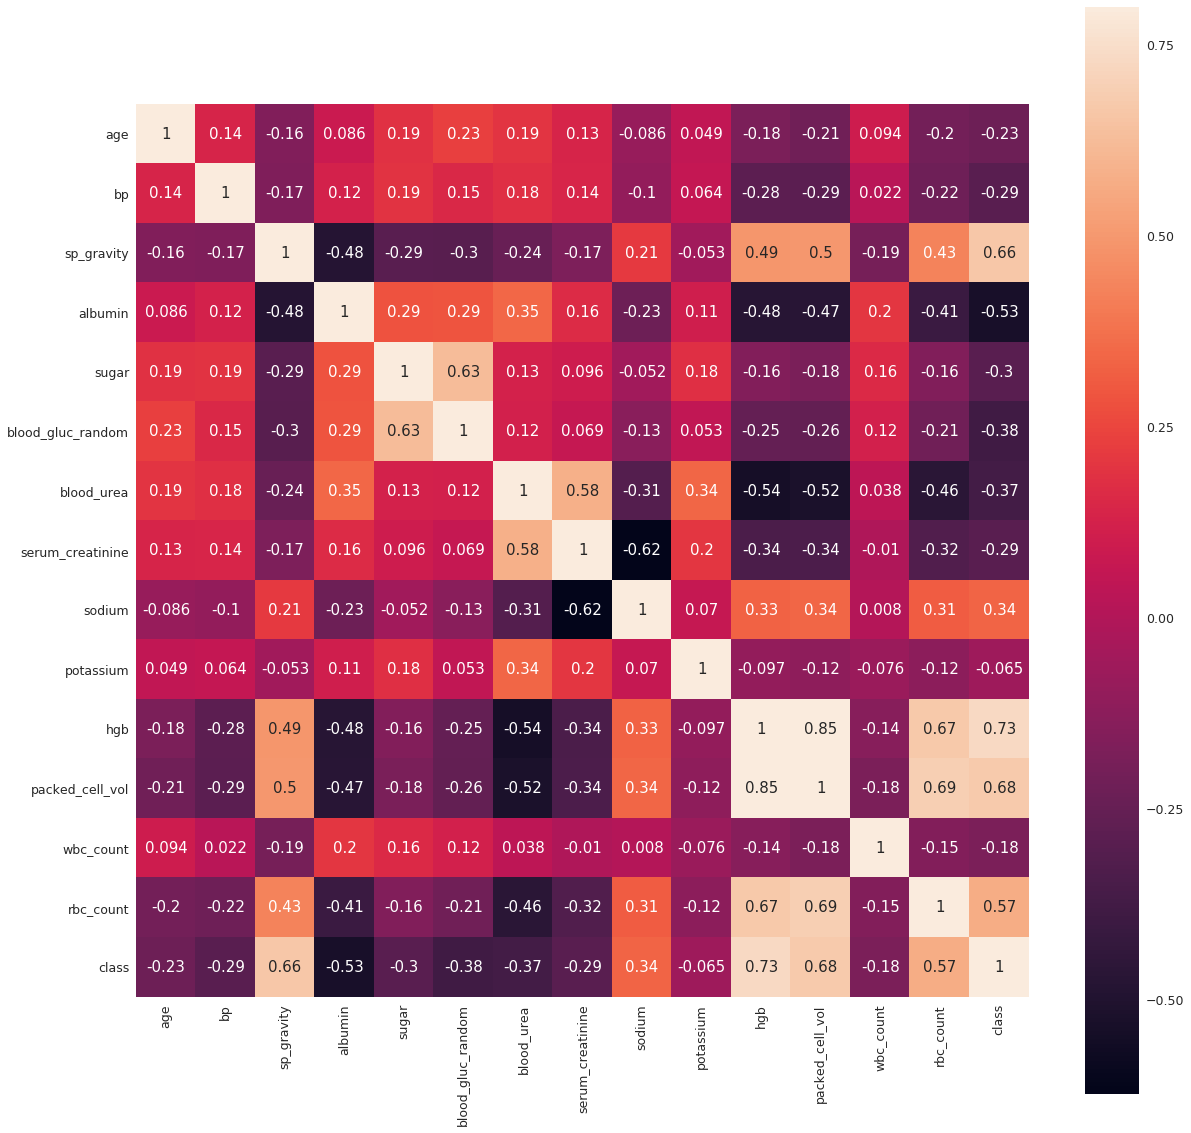

In [99]:
import seaborn as sns
#correlation matrix
corrmat = df_clean2.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);

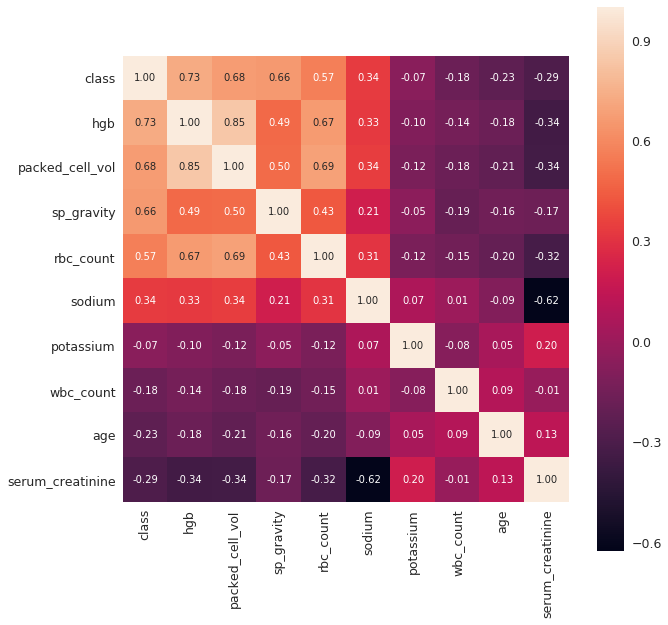

In [57]:
#Kidney disease correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'class')['class'].index
cm = np.corrcoef(df_clean2[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

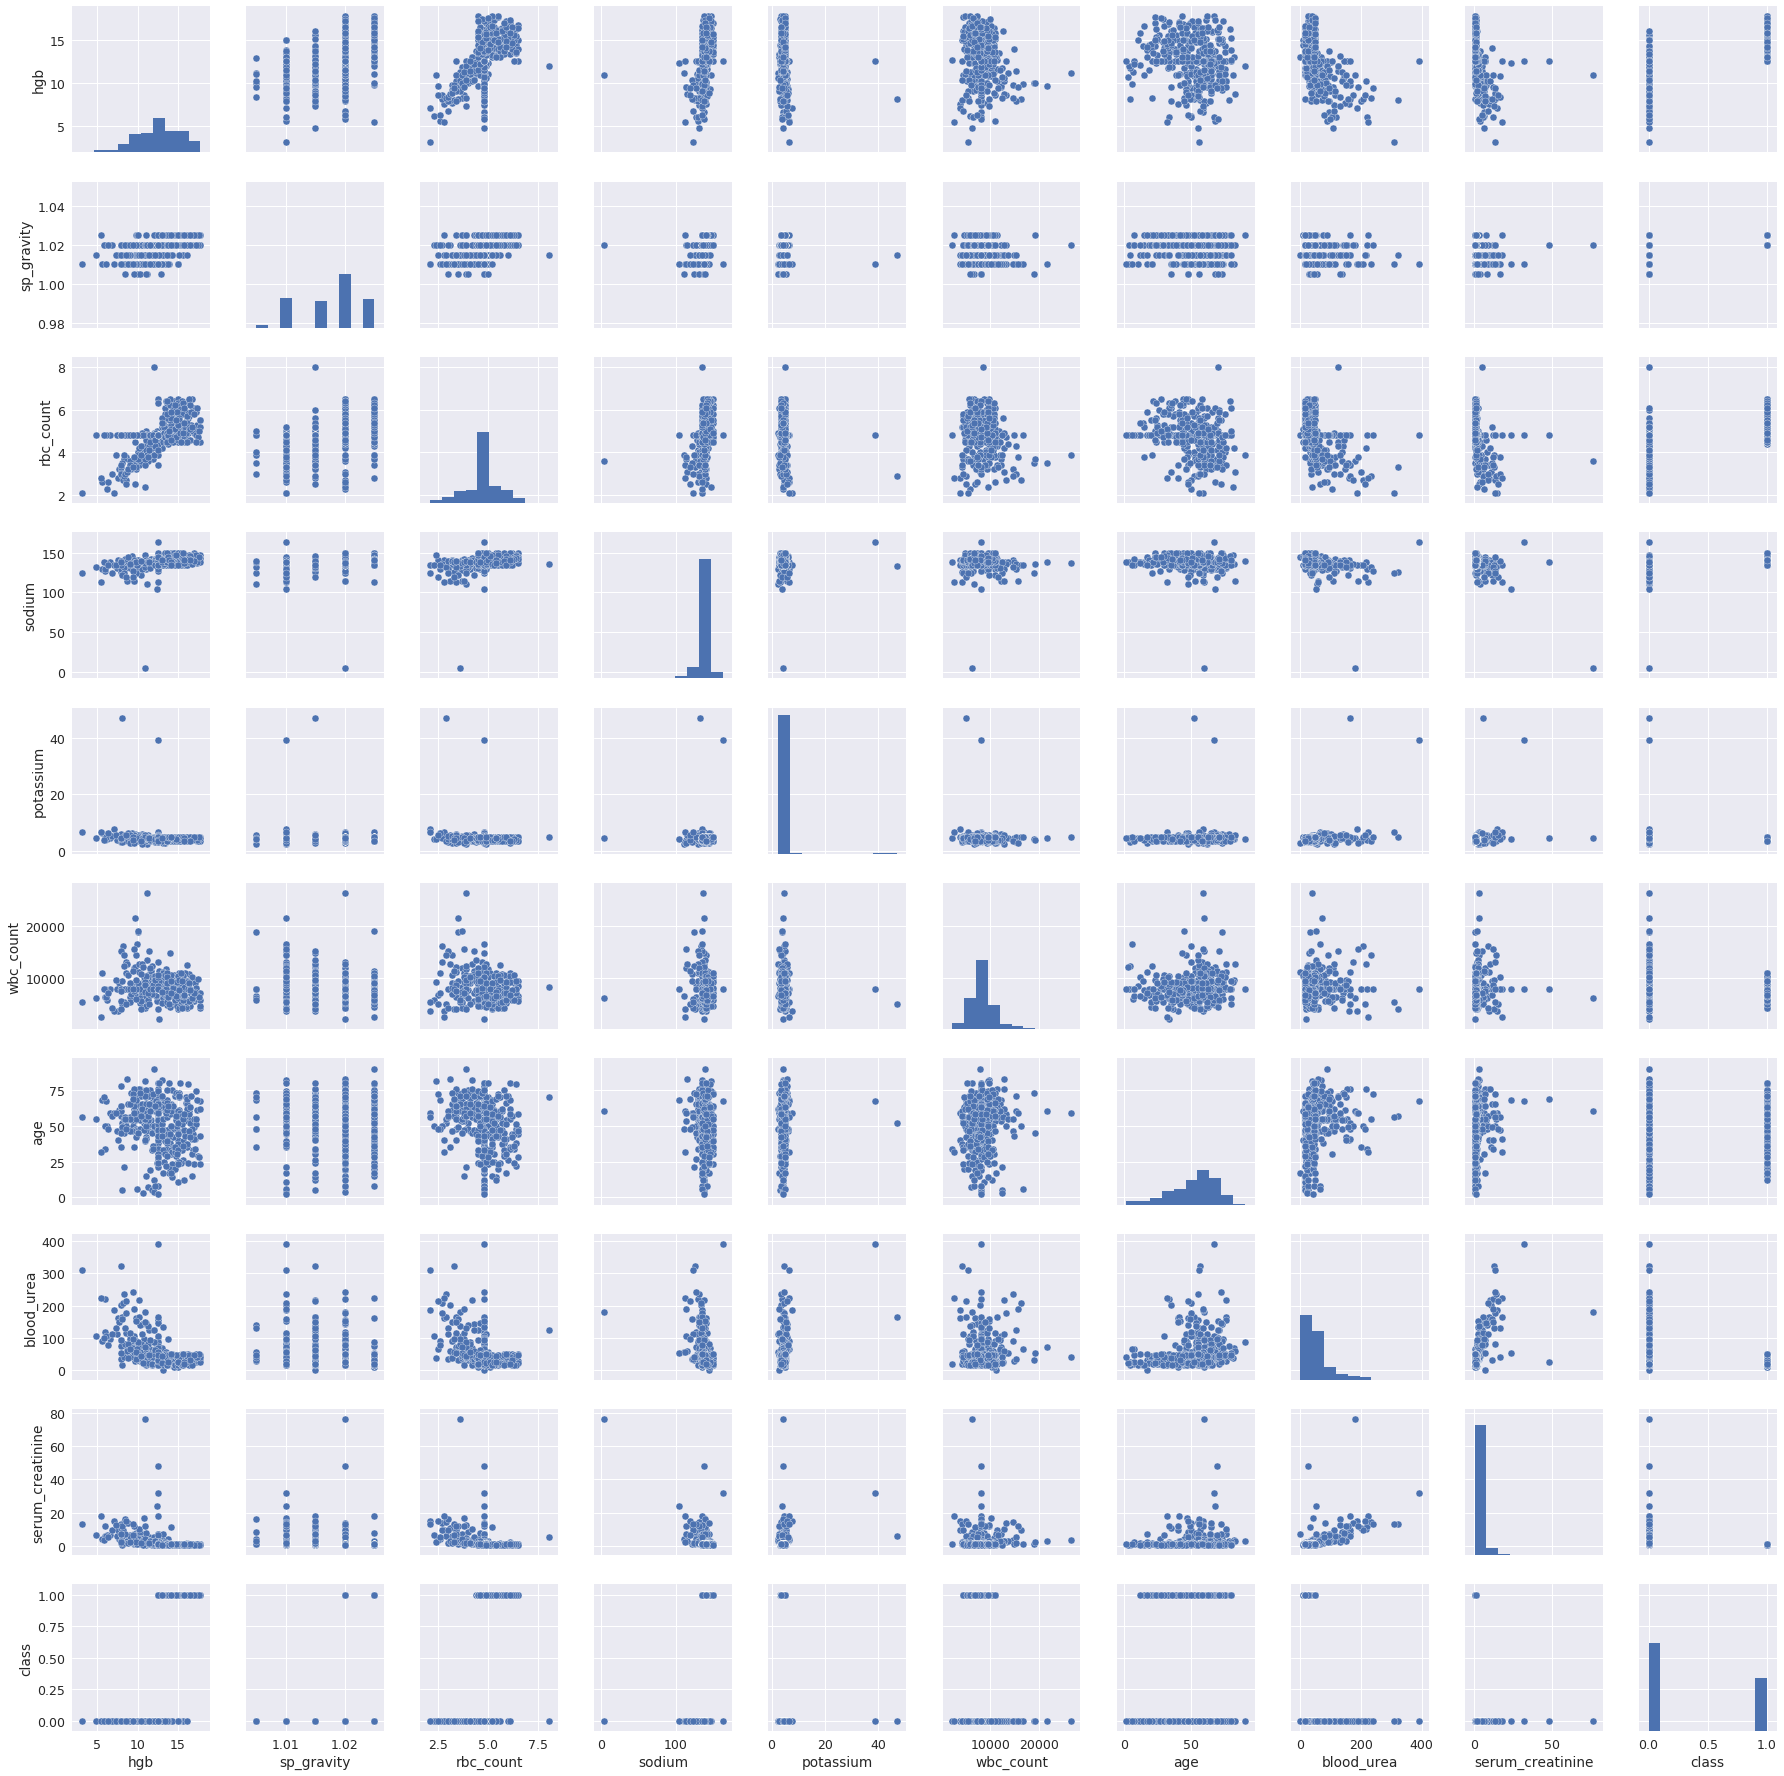

In [136]:
import seaborn as sns
#scatterplot
cols = ['hgb', 'sp_gravity', 'rbc_count', 'sodium', 'potassium', 'wbc_count', 'age', 'blood_urea','serum_creatinine', 'class']
sns.pairplot(df_clean2[cols], size = 2.5)
plt.show()

In [123]:
X_encoded = pd.get_dummies(X, prefix_sep='_', drop_first=True)

In [124]:
X_encoded.head()

,age,bp,sp_gravity,albumin,sugar,blood_gluc_random,blood_urea,serum_creatinine,sodium,potassium,...,diabetus_mellitus_no,diabetus_mellitus_yes,cad_no,cad_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes
0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,0,1,0,1,0,1,0,1,0
1,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,0,1,1,0,0,1,1,0,0,1
2,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,0,1,0,1,0,1
3,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,0,1,0,1,0,1,0,1,0
4,60.0,90.0,1.015,3.0,0.0,74.0,25.0,1.1,142.0,3.2,...,0,1,1,0,1,0,0,1,1,0


In [125]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 35 columns):
age                              399 non-null float64
bp                               399 non-null float64
sp_gravity                       399 non-null float64
albumin                          399 non-null float64
sugar                            399 non-null float64
blood_gluc_random                399 non-null float64
blood_urea                       399 non-null float64
serum_creatinine                 399 non-null float64
sodium                           399 non-null float64
potassium                        399 non-null float64
hgb                              399 non-null float64
packed_cell_vol                  399 non-null float64
wbc_count                        399 non-null float64
rbc_count                        399 non-null float64
rbc_level_abnormal               399 non-null uint8
rbc_level_normal                 399 non-null uint8
puscell_presentornot_abnormal    39

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


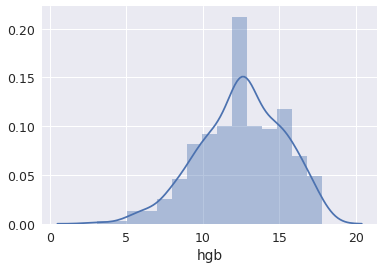

In [66]:
import seaborn as sns
sns.distplot(X_encoded['hgb'])

In [126]:
## Should the test-train split after moving label to another dataframe or before moving label 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=23)

In [127]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [128]:
# Evaluating model quality
from sklearn.model_selection import cross_val_score

### Finding cross validation score without pipelines
xgb_clf = xgb.XGBClassifier()
scores = cross_val_score(xgb_clf,X_train,y_train,scoring="roc_auc",cv=10)
final_avg = np.mean(scores)
print(final_avg)

1.0


In [129]:
xgb_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params={"objective":"binary:logistic", "max_depth":4}
cv_results = xgb.cv(dtrain = xgb_dmatrix, params=params, nfold=4, num_boost_round=10, metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

[18:04:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[18:04:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:04:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[18:04:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[18:04:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[18:04:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[18:04:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[18:04:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[18:04:51] /workspa

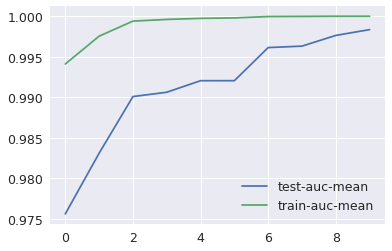

In [130]:
#print(cv_results)
cv_results.loc[0:,["test-auc-mean", "train-auc-mean"]].plot()

In [131]:
xgb_clf = xgb.XGBClassifier()

from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
gbm_param_grid = {
    'learning_rate': np.arange(0.05, 1.05, 0.05),
    'max_depth': range(3, 11),
    'n_estimators': np.arange(50, 250, 50) # number of boosting rounds
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=xgb_clf, param_distributions=gbm_param_grid, n_iter=5, scoring="roc_auc", cv=3, verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X_train, y_train)

# Compute metrics
print('Lowest RMSE found: ',randomized_roc_auc.best_score_)
print('best_estimator_ :',randomized_roc_auc.best_estimator_)
print('Best parameters found:: ', randomized_roc_auc.best_params_)
print('scorer_ :',randomized_roc_auc.scorer_ )

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Lowest RMSE found:  1.0
best_estimator_ : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Best parameters found::  {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.4}
scorer_ : make_scorer(roc_auc_score, needs_threshold=True)


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished


In [132]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_roc_auc.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_roc_auc.best_score_)))

Best parameters found:  {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.4}
Lowest RMSE found:  1.0


In [139]:
clf_best = randomized_roc_auc.best_estimator_
print(clf_best)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [133]:
import matplotlib.pyplot as plt

# Train the model
xg_reg = xgb.train(dtrain=xgb_dmatrix, params=params, num_boost_round=10)

[18:05:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[18:05:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[18:05:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[18:05:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[18:05:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[18:05:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[18:05:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[18:05:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[18:05:58] /work

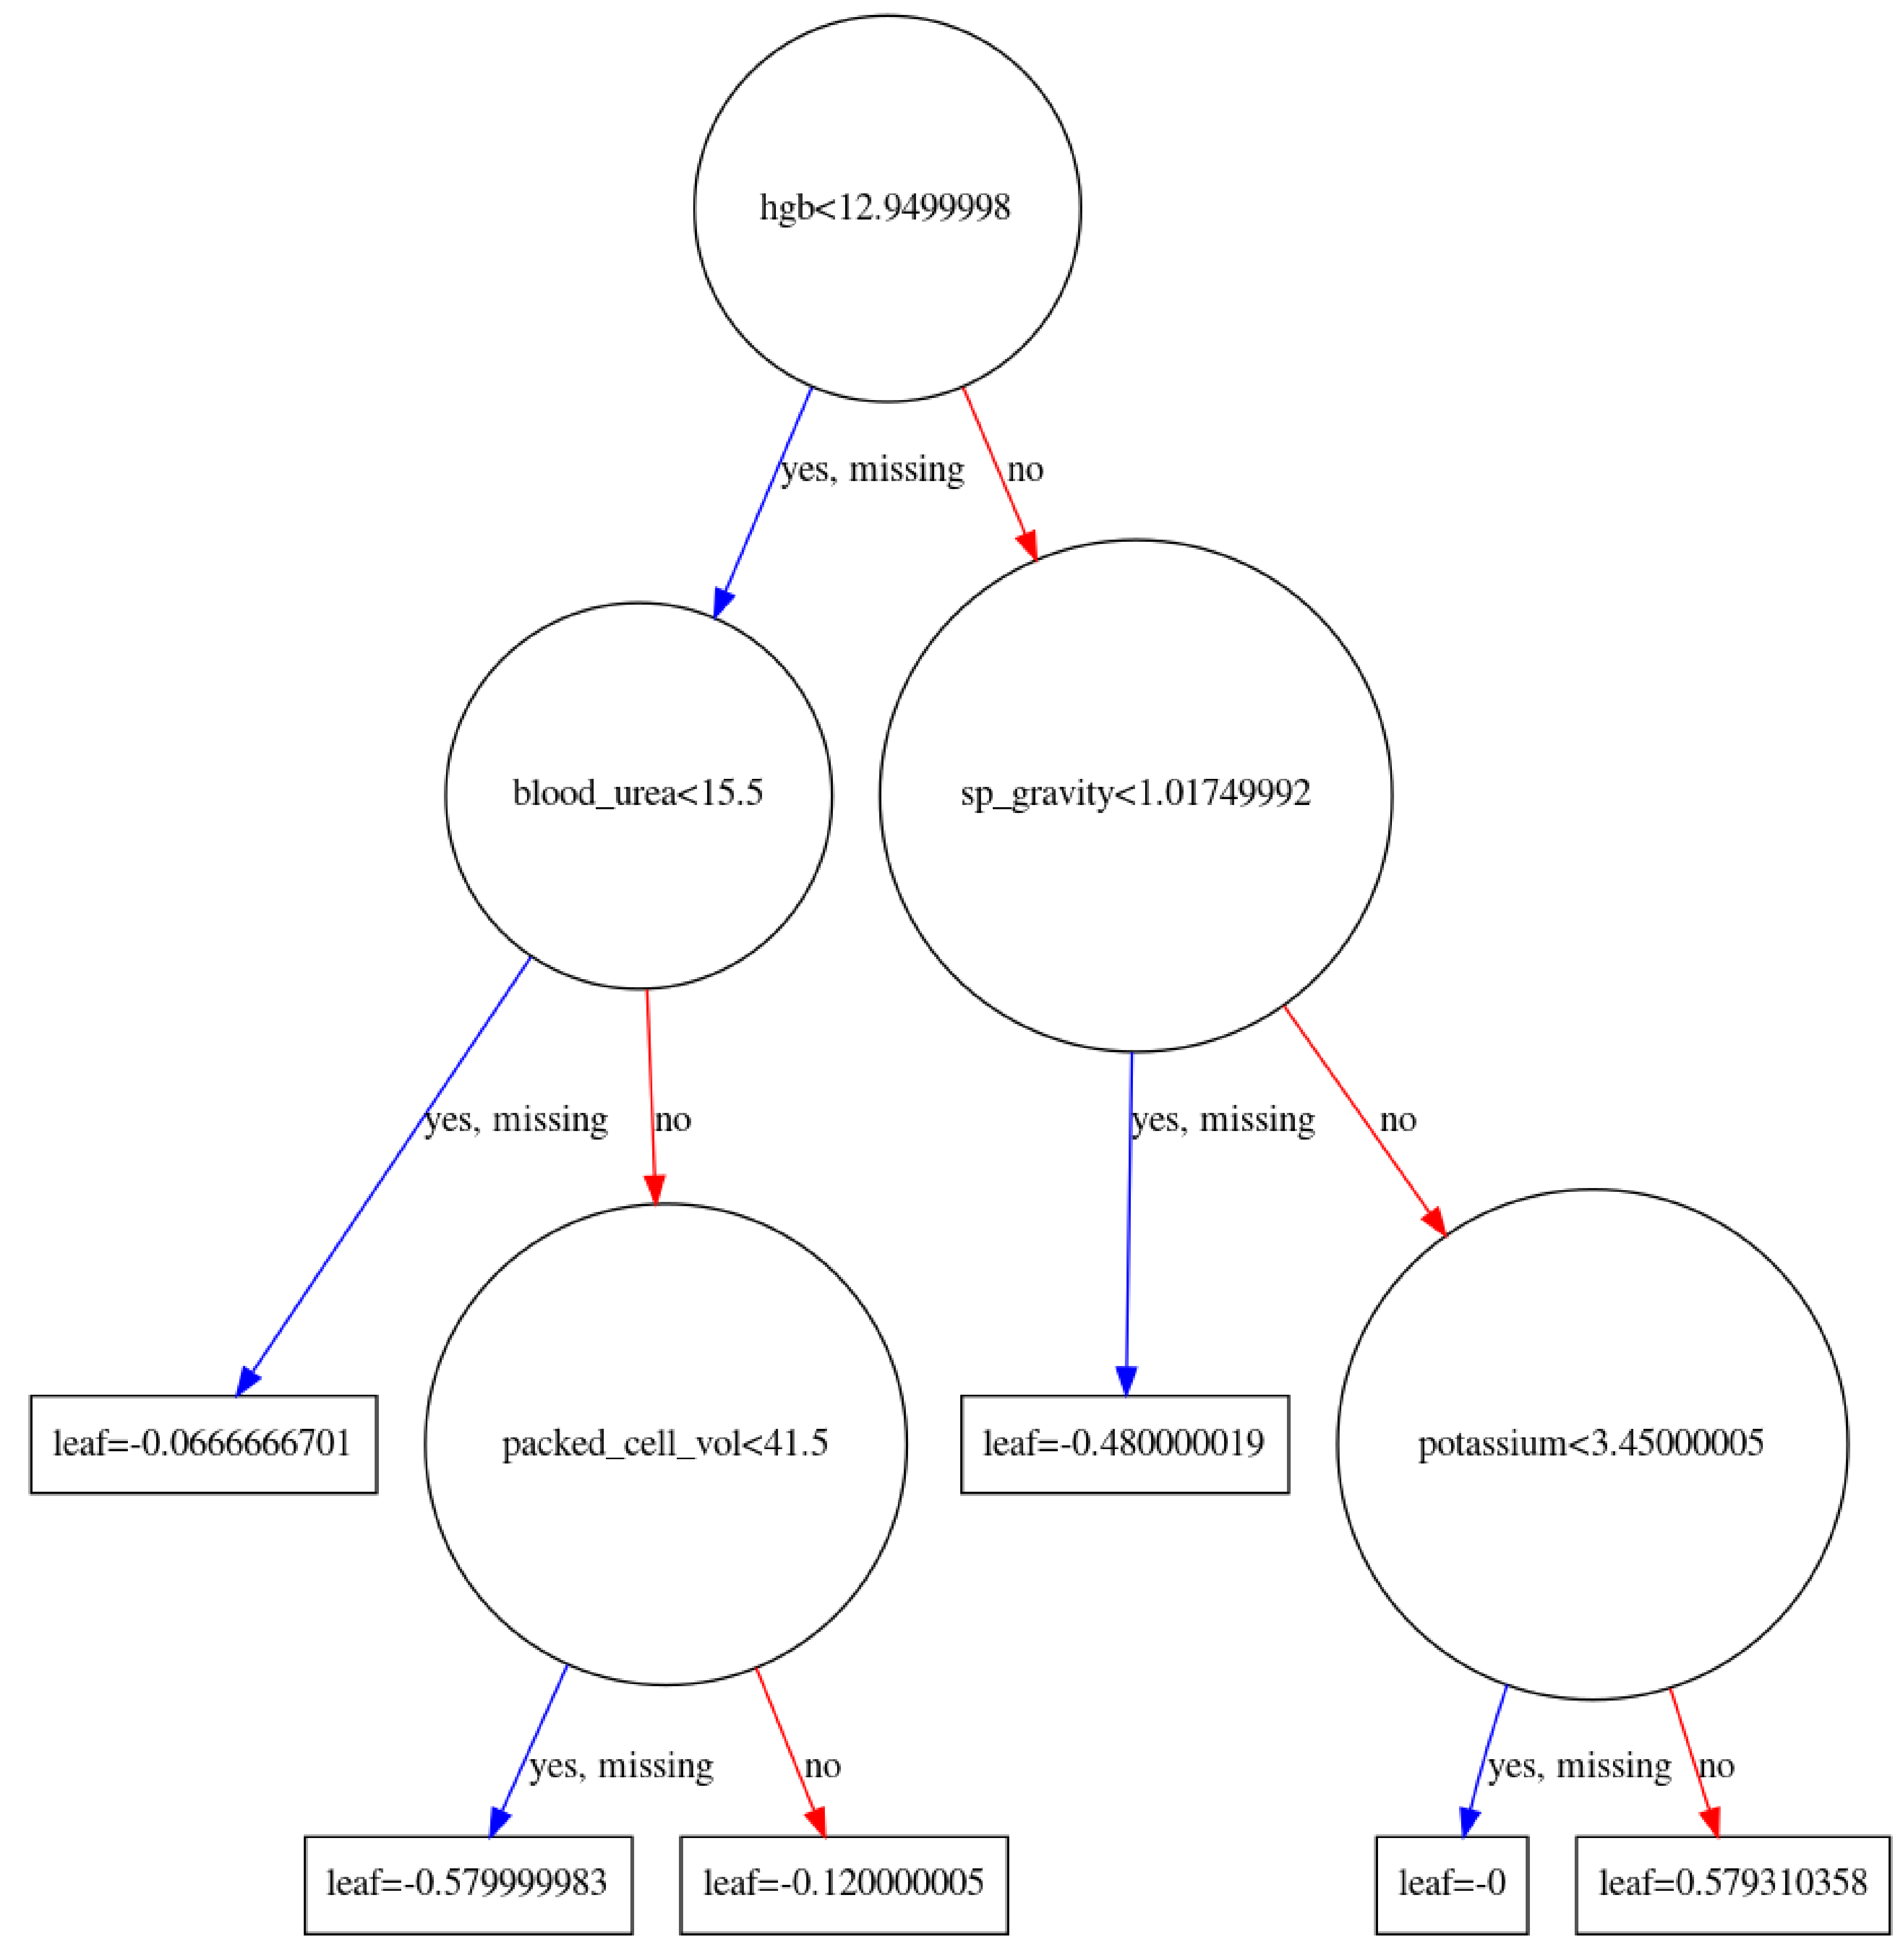

In [134]:
# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(100, 67)
fig.savefig('tree.png')

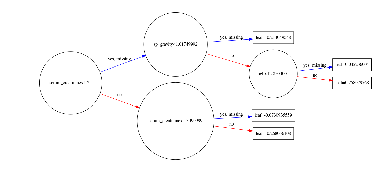

In [137]:
xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")
fig.set_size_inches(100, 67)
plt.show()

['age', 'bp', 'sp_gravity', 'albumin', 'sugar', 'blood_gluc_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hgb', 'packed_cell_vol', 'wbc_count', 'rbc_count', 'rbc_level_abnormal', 'rbc_level_normal', 'puscell_presentornot_abnormal', 'puscell_presentornot_normal', 'pus_cell_clumps_notpresent', 'pus_cell_clumps_present', 'bacteria_notpresent', 'bacteria_present', 'hypertension_no', 'hypertension_yes', 'diabetus_mellitus_ yes', 'diabetus_mellitus_no', 'diabetus_mellitus_yes', 'cad_no', 'cad_yes', 'appetite_good', 'appetite_poor', 'pedal_edema_no', 'pedal_edema_yes', 'anemia_no', 'anemia_yes']
[0.03448275849223137, 0.0, 0.09195402264595032, 0.06896551698446274, 0.0, 0.01149425283074379, 0.02298850566148758, 0.09195402264595032, 0.04597701132297516, 0.01149425283074379, 0.28735631704330444, 0.13793103396892548, 0.0, 0.03448275849223137, 0.0, 0.14942528307437897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01149425283074379, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Text(0.5,1,'Feature Importance')

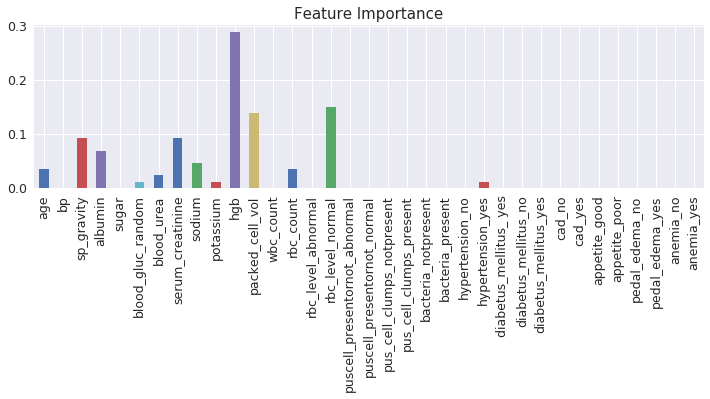

In [140]:
plt.figure(figsize=(12,3))
features = X_train.columns.values.tolist()
print(features)
importance = clf_best.feature_importances_.tolist()
print(importance)
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

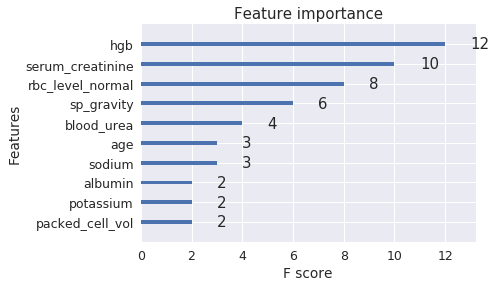

In [141]:
xgb.plot_importance(xg_reg)
plt.show()

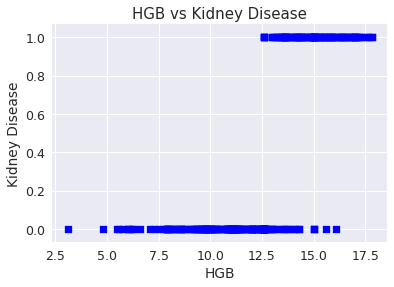

In [142]:
plt.scatter(X_train.hgb, y_train, c = "blue", marker = "s")
plt.title("HGB vs Kidney Disease")
plt.xlabel("HGB")
plt.ylabel("Kidney Disease")
plt.show()

In [ ]:
#Need more research - When should I call refit?
randomized_roc_auc.refit

In [143]:
preds = randomized_roc_auc.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 1.000000


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [144]:
probabilities = randomized_roc_auc.predict_proba(X_test)
probabilities

array([[9.78276193e-01, 2.17238180e-02],
       [9.88841057e-04, 9.99011159e-01],
       [9.99501646e-01, 4.98349138e-04],
       [2.61455774e-03, 9.97385442e-01],
       [9.99501646e-01, 4.98349138e-04],
       [2.41017342e-03, 9.97589827e-01],
       [2.54060626e-02, 9.74593937e-01],
       [2.41017342e-03, 9.97589827e-01],
       [1.01754487e-01, 8.98245513e-01],
       [2.11876631e-03, 9.97881234e-01],
       [9.51036453e-01, 4.89635430e-02],
       [1.37901306e-03, 9.98620987e-01],
       [9.91450429e-01, 8.54958780e-03],
       [3.13178897e-02, 9.68682110e-01],
       [9.85194087e-01, 1.48059055e-02],
       [9.99148428e-01, 8.51581804e-04],
       [1.42836571e-03, 9.98571634e-01],
       [9.99501646e-01, 4.98349138e-04],
       [2.06947327e-03, 9.97930527e-01],
       [8.55565071e-04, 9.99144435e-01],
       [1.75631046e-03, 9.98243690e-01],
       [9.98585999e-01, 1.41397282e-03],
       [7.52228498e-03, 9.92477715e-01],
       [9.96635556e-01, 3.36447242e-03],
       [9.950069

In [145]:
preds = xgb_clf.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

XGBoostError: need to call fit or load_model beforehand

In [146]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, preds))

confusion = confusion_matrix(y_test, preds)
print('Confusion Matrix:')
print(confusion)

print('Accuracy: %3f' % accuracy_score(y_test, preds))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       1.00      1.00      1.00        31

avg / total       1.00      1.00      1.00        80

Confusion Matrix:
[[49  0]
 [ 0 31]]
Accuracy: 1.000000


In [147]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.9875


In [148]:
from sklearn.ensemble import RandomForestClassifier
# DecisionTreeClassifier for single tree
from sklearn.model_selection import cross_val_score
rf_clf = RandomForestClassifier()
scores = cross_val_score(rf_clf,X_train,y_train,scoring="roc_auc",cv=10)
#scores = cross_val_score(xgb_clf,X_train,y_train,scoring="roc_auc",cv=10)

final_avg = np.mean(scores)
print(final_avg)

0.9995833333333334


In [149]:
preds

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [150]:
#submission_preds = lgb_model.predict(test_model)
submission_preds_transformed = np.exp(preds)
submission_preds_transformed

array([1.        , 2.71828183, 1.        , 2.71828183, 1.        ,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       1.        , 2.71828183, 1.        , 2.71828183, 1.        ,
       1.        , 2.71828183, 1.        , 2.71828183, 2.71828183,
       2.71828183, 1.        , 2.71828183, 1.        , 1.        ,
       1.        , 1.        , 2.71828183, 2.71828183, 1.        ,
       1.        , 1.        , 1.        , 2.71828183, 1.        ,
       1.        , 2.71828183, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 2.71828183,
       2.71828183, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 2.71828183, 1.        , 2.71828183,
       2.71828183, 1.        , 2.71828183, 2.71828183, 2.71828183,
       1.        , 1.        , 1.        , 2.71828183, 2.71828183,
       1.        , 2.71828183, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 2.71828

In [151]:
df_lgb_submission = pd.DataFrame({'Kidney Disease':np.ceil(submission_preds_transformed)})
df_lgb_submission

,Kidney Disease
0,1.0
1,3.0
2,1.0
3,3.0
4,1.0
5,3.0
6,3.0
7,3.0
8,3.0
9,3.0
